# An√°lisis Exploratorio: Adopci√≥n de Internet y Desigualdad en Sudam√©rica

## Objetivos del An√°lisis

Este notebook explora la **adopci√≥n de Internet** en pa√≠ses sudamericanos y su relaci√≥n con la **desigualdad socioecon√≥mica** medida por el √≠ndice de Gini. Espec√≠ficamente:

1. **Evoluci√≥n temporal**: Analizar las tendencias de adopci√≥n de Internet desde 2000
2. **An√°lisis comparativo**: Identificar patrones entre pa√≠ses sudamericanos
3. **Correlaci√≥n con desigualdad**: Examinar la relaci√≥n entre conectividad e inequidad
4. **Caso Bolivia**: Profundizar en la trayectoria boliviana compar√°ndola con pa√≠ses pares

## Fuente de Datos

Los datos provienen del **Banco Mundial** a trav√©s de su API, utilizando los siguientes indicadores:
- `IT.NET.USER.ZS`: Usuarios de Internet (% de la poblaci√≥n)
- `SI.POV.GINI`: √çndice de Gini (medida de desigualdad)

## üîß Configuraci√≥n del Entorno

Instalamos las librer√≠as necesarias para el an√°lisis de datos y visualizaci√≥n:

In [1]:
%pip install pandas seaborn requests pycountry

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6.3/6.3 MB 11.5 MB/s eta 0:00:00a 0:00:01‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0.0/6.3 MB ? eta -:--:--
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6.3/6.3 MB 11.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd, requests, pycountry
import seaborn as sns, matplotlib.pyplot as plt

COUNTRIES = "ARG;BOL;BRA;CHL;COL;ECU;PRY;PER;URY;VEN"
BASE = "https://api.worldbank.org/v2/country/{countries}/indicator/{indicator}?format=json&per_page=20000"
def wb_series(indicator):
    r = requests.get(BASE.format(countries=COUNTRIES, indicator=indicator))
    r.raise_for_status()
    data = r.json()[1]
    df = pd.DataFrame(data)[["country","date","value"]]
    df["country"] = df["country"].apply(lambda x: x["value"])
    df["date"] = pd.to_numeric(df["date"], errors="coerce")
    df["value"] = pd.to_numeric(df["value"], errors="coerce")
    return df.dropna(subset=["date"]).astype({"date":"int"})


### Funci√≥n para obtener datos del Banco Mundial

La funci√≥n `wb_series()` nos permite:
- üåç Obtener datos de 10 pa√≠ses sudamericanos (ARG, BOL, BRA, CHL, COL, ECU, PRY, PER, URY, VEN)
- üîÑ Convertir la respuesta JSON de la API en un DataFrame limpio
- üìä Preparar los datos para an√°lisis y visualizaci√≥n

**Par√°metros**: `indicator` - c√≥digo del indicador del Banco Mundial  
**Retorna**: DataFrame con columnas `country`, `date`, `value`

## An√°lisis 1: Evoluci√≥n de la Adopci√≥n de Internet (2000-2023)

En esta secci√≥n analizamos las **tendencias de conectividad** en Sudam√©rica:

- **Crecimiento temporal**: ¬øC√≥mo ha evolucionado el acceso a Internet desde 2000?
- **L√≠deres regionales**: ¬øQu√© pa√≠ses tienen mayor penetraci√≥n de Internet?
- **Brechas digitales**: ¬øExisten diferencias significativas entre pa√≠ses?

> **Indicador**: `IT.NET.USER.ZS` - Usuarios de Internet como porcentaje de la poblaci√≥n total

üìä Muestra de datos de Internet descargados:
Total de observaciones: 235
Pa√≠ses incluidos: ['Argentina' 'Bolivia' 'Brazil' 'Chile' 'Colombia' 'Ecuador' 'Peru'
 'Paraguay' 'Uruguay' 'Venezuela, RB']
Rango temporal: 2000-2024

üîç Primeros registros:
      country  date  value
1   Argentina  2023   89.2
2   Argentina  2022   88.4
3   Argentina  2021   87.2
4   Argentina  2020   85.5
5   Argentina  2019   79.9
6   Argentina  2018   77.7
7   Argentina  2017   74.3
8   Argentina  2016   71.0
9   Argentina  2015   68.0
10  Argentina  2014   64.7

üìà √öltimos datos por pa√≠s:
           country  date  value
196          Chile  2023   94.5
521        Uruguay  2023   89.9
1        Argentina  2023   89.2
131         Brazil  2023   84.2
391           Peru  2023   79.5
456       Paraguay  2023   78.1
261       Colombia  2023   77.3
325        Ecuador  2024   77.2
66         Bolivia  2023   70.2
592  Venezuela, RB  2017   61.6


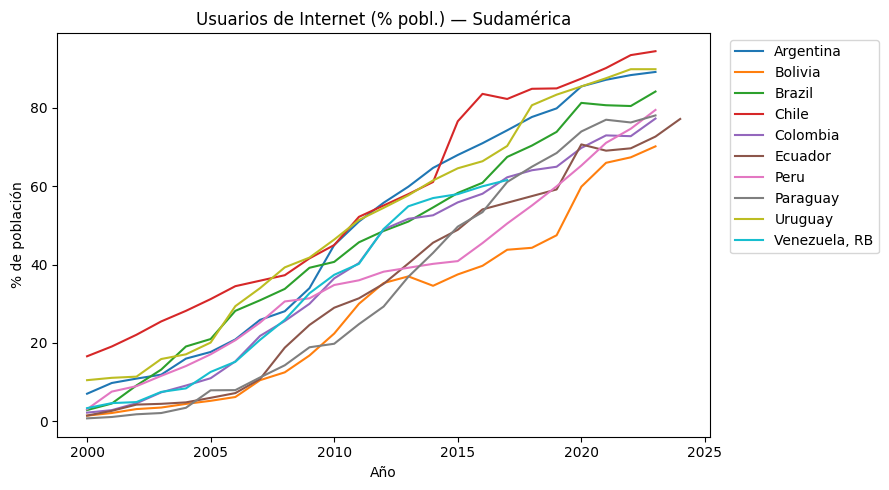

In [7]:
internet = wb_series("IT.NET.USER.ZS")  # % de poblaci√≥n
internet = internet.query("date >= 2000").dropna(subset=["value"])

# Mostrar muestra de los datos obtenidos
print("üìä Muestra de datos de Internet descargados:")
print(f"Total de observaciones: {len(internet)}")
print(f"Pa√≠ses incluidos: {internet['country'].unique()}")
print(f"Rango temporal: {internet['date'].min()}-{internet['date'].max()}")
print("\nüîç Primeros registros:")
print(internet.head(10))
print("\nüìà √öltimos datos por pa√≠s:")
print(internet.sort_values(['country', 'date']).groupby('country').tail(1).sort_values('value', ascending=False))

plt.figure(figsize=(9,5))
sns.lineplot(data=internet, x="date", y="value", hue="country")
plt.title("Usuarios de Internet (% pobl.) ‚Äî Sudam√©rica")
plt.xlabel("A√±o"); plt.ylabel("% de poblaci√≥n"); plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()

## ‚öñÔ∏è An√°lisis 2: Relaci√≥n entre Internet y Desigualdad

¬øExiste una **correlaci√≥n** entre el acceso a Internet y la desigualdad socioecon√≥mica?

### üîç Hip√≥tesis a explorar:
- **H1**: Mayor conectividad podr√≠a estar asociada con menor desigualdad
- **H2**: Los pa√≠ses con mejor infraestructura digital podr√≠an tener distribuci√≥n m√°s equitativa

### üìä Metodolog√≠a:
1. Obtener el **√∫ltimo a√±o disponible** de cada indicador por pa√≠s
2. Crear un **scatter plot** para visualizar la correlaci√≥n
3. Calcular la **regresi√≥n lineal** para identificar tendencias

> **Indicadores**: Internet (`IT.NET.USER.ZS`) vs. Gini (`SI.POV.GINI`)  
> **√çndice Gini**: 0 = igualdad perfecta, 100 = desigualdad m√°xima

üìä Muestra de datos de Gini descargados:
Total de observaciones: 650
Pa√≠ses con datos: ['Argentina' 'Bolivia' 'Brazil' 'Chile' 'Colombia' 'Ecuador' 'Peru'
 'Paraguay' 'Uruguay' 'Venezuela, RB']
Rango temporal disponible: 1960-2024

üîç √öltimos datos disponibles por pa√≠s:
           country  date  value
1        Argentina  2023   42.4
66         Bolivia  2023   42.1
131         Brazil  2023   51.6
261       Colombia  2023   53.9
326        Ecuador  2023   44.6
456       Paraguay  2023   44.4
391           Peru  2023   40.7
521        Uruguay  2023   40.9
197          Chile  2022   43.0
603  Venezuela, RB  2006   44.7

‚úÖ Pa√≠ses con datos completos para el an√°lisis: 9
Rango a√±os Gini: 2022-2023
Rango a√±os Internet: 2023-2024


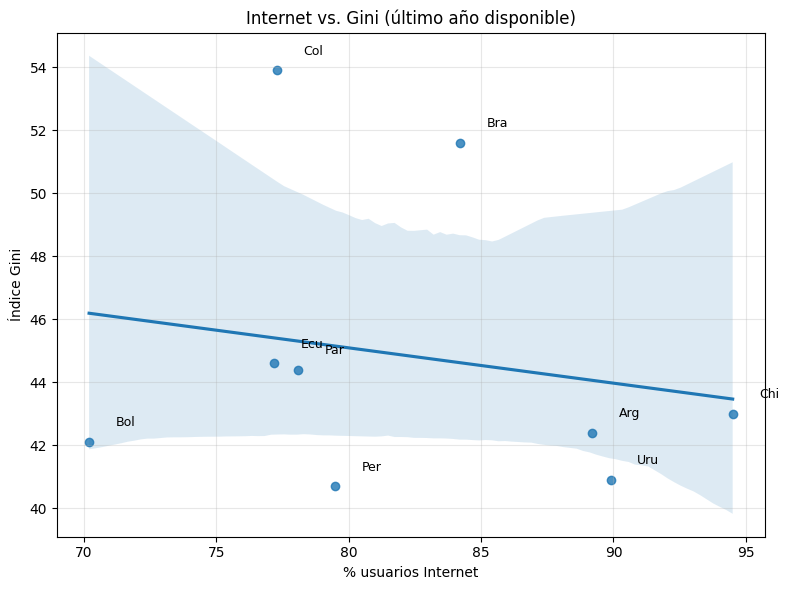


üìä Correlaci√≥n Internet-Gini: -0.184


country  internet_pct  gini  date_gini
3      Chile          94.5  43.0       2022
8    Uruguay          89.9  40.9       2023
0  Argentina          89.2  42.4       2023
2     Brazil          84.2  51.6       2023
7       Peru          79.5  40.7       2023

In [8]:
gini = wb_series("SI.POV.GINI")

# Mostrar muestra de los datos de Gini descargados
print("üìä Muestra de datos de Gini descargados:")
print(f"Total de observaciones: {len(gini)}")
print(f"Pa√≠ses con datos: {gini.dropna(subset=['value'])['country'].unique()}")
print(f"Rango temporal disponible: {gini['date'].min()}-{gini['date'].max()}")
print("\nüîç √öltimos datos disponibles por pa√≠s:")
gini_sample = gini.dropna(subset=["value"]).sort_values(['country', 'date']).groupby('country').tail(1)
print(gini_sample[['country', 'date', 'value']].sort_values('date', ascending=False))

# Filtrar datos v√°lidos y obtener los m√°s recientes por pa√≠s
gini_clean = gini.dropna(subset=["value"]).query("date >= 2010")
gini_ult = gini_clean.sort_values(["country","date"]).groupby("country").tail(1)

internet_ult = internet.sort_values(["country","date"]).groupby("country").tail(1)
df = pd.merge(internet_ult, gini_ult, on="country", suffixes=("_internet","_gini"))
df = df.rename(columns={"value_internet":"internet_pct","value_gini":"gini"})

print(f"\n‚úÖ Pa√≠ses con datos completos para el an√°lisis: {len(df)}")
print(f"Rango a√±os Gini: {df['date_gini'].min()}-{df['date_gini'].max()}")
print(f"Rango a√±os Internet: {df['date_internet'].min()}-{df['date_internet'].max()}")

plt.figure(figsize=(8,6))
sns.regplot(data=df, x="internet_pct", y="gini", ci=95)
for _, r in df.iterrows():
    plt.text(r["internet_pct"]+1, r["gini"]+0.5, r["country"][:3], fontsize=9)
plt.title("Internet vs. Gini (√∫ltimo a√±o disponible)")
plt.xlabel("% usuarios Internet"); plt.ylabel("√çndice Gini")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Mostrar correlaci√≥n
corr = df[['internet_pct', 'gini']].corr().iloc[0,1]
print(f"\nüìä Correlaci√≥n Internet-Gini: {corr:.3f}")

df.sort_values("internet_pct", ascending=False)[['country', 'internet_pct', 'gini', 'date_gini']].head()

## An√°lisis 3: Caso Bolivia - Trayectoria y Benchmarking Regional

### Enfoque espec√≠fico en Bolivia

En esta secci√≥n profundizamos en el **caso boliviano**, compar√°ndolo con pa√≠ses de contexto similar:

####  Pa√≠ses de comparaci√≥n (peers):
- **Per√∫**: Geograf√≠a andina similar, contexto socioecon√≥mico comparable
- **Paraguay**: Econom√≠a emergente, poblaci√≥n similar  
- **Chile**: Referente regional en desarrollo digital
- **Argentina**: Mayor econom√≠a regional
- **Brasil**: Potencia regional

###  Preguntas de investigaci√≥n:
1. ¬øC√≥mo se posiciona Bolivia frente a sus pares regionales?
2. ¬øHa logrado convergencia o persisten brechas significativas?
3. ¬øEn qu√© per√≠odos Bolivia mostr√≥ mayor/menor crecimiento relativo?

üáßüá¥ Datos para el an√°lisis de Bolivia:
Observaciones de Bolivia: 24 puntos temporales
Rango temporal Bolivia: 2000-2023
Progreso Bolivia: 1.4% (a√±o 2000) ‚Üí 70.2% (a√±o 2023)

üåé Datos de pa√≠ses pares: 120 observaciones
Pa√≠ses incluidos: ['Argentina' 'Brazil' 'Chile' 'Peru' 'Paraguay']

üìä Posici√≥n actual de Bolivia vs. pares (√∫ltimo a√±o):
       country  date  value
196      Chile  2023   94.5
1    Argentina  2023   89.2
131     Brazil  2023   84.2
391       Peru  2023   79.5
456   Paraguay  2023   78.1
66     Bolivia  2023   70.2


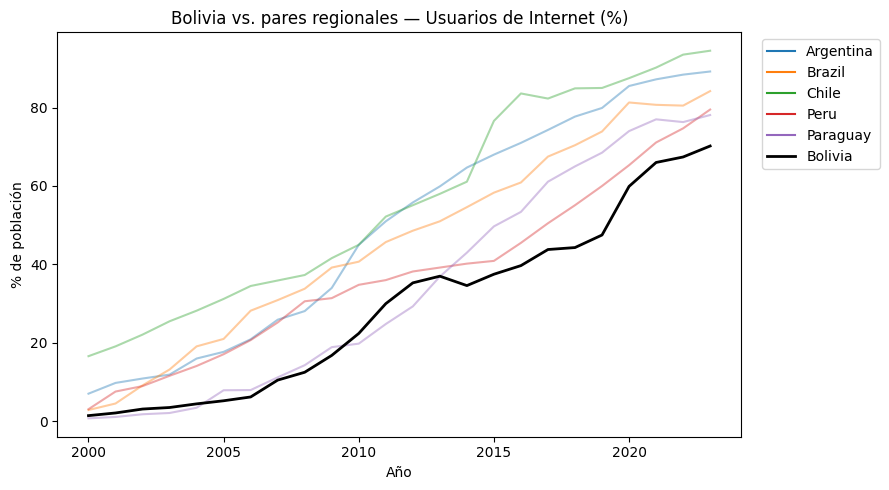

In [11]:
bol = internet.query("country == 'Bolivia'").copy()
peer = internet.query("country in ['Peru','Paraguay','Chile','Argentina','Brazil']") 

# Mostrar informaci√≥n sobre los datos para el an√°lisis de Bolivia
print("üáßüá¥ Datos para el an√°lisis de Bolivia:")
print(f"Observaciones de Bolivia: {len(bol)} puntos temporales")
print(f"Rango temporal Bolivia: {bol['date'].min()}-{bol['date'].max()}")
# Ordenar por fecha para obtener correctamente primer y √∫ltimo a√±o
bol_sorted = bol.sort_values('date')
print(f"Progreso Bolivia: {bol_sorted['value'].iloc[0]:.1f}% (a√±o {bol_sorted['date'].iloc[0]}) ‚Üí {bol_sorted['value'].iloc[-1]:.1f}% (a√±o {bol_sorted['date'].iloc[-1]})")

print(f"\nüåé Datos de pa√≠ses pares: {len(peer)} observaciones")
print(f"Pa√≠ses incluidos: {peer['country'].unique()}")
print("\nüìä Posici√≥n actual de Bolivia vs. pares (√∫ltimo a√±o):")
current_comparison = internet.sort_values(['country', 'date']).groupby('country').tail(1)
bolivia_peers = current_comparison[current_comparison['country'].isin(['Bolivia', 'Peru','Paraguay','Chile','Argentina','Brazil'])]
print(bolivia_peers[['country', 'date', 'value']].sort_values('value', ascending=False))

plt.figure(figsize=(9,5))
sns.lineplot(data=peer, x="date", y="value", hue="country", alpha=0.4)
sns.lineplot(data=bol, x="date", y="value", color="black", linewidth=2, label="Bolivia")
plt.title("Bolivia vs. pares regionales ‚Äî Usuarios de Internet (%)")
plt.xlabel("A√±o"); plt.ylabel("% de poblaci√≥n"); plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()

## Conclusiones del An√°lisis

### **Adopci√≥n de Internet en Sudam√©rica**

1. **Liderazgo regional**: Chile (~94.5%), Uruguay (~90%), Argentina (~89%) son los pa√≠ses con mayor penetraci√≥n
2. **Crecimiento acelerado**: Todos los pa√≠ses muestran crecimiento exponencial post-2010
3. **Brecha digital persistente**: Diferencias de >20 puntos porcentuales entre l√≠deres y rezagados

### **Relaci√≥n Internet-Desigualdad**

- **Correlaci√≥n d√©bil negativa** (r = -0.184): Sugiere que mayor conectividad podr√≠a asociarse ligeramente con menor desigualdad
- **Datos limitados**: Solo 9 pa√≠ses con informaci√≥n completa reciente
- **Casos destacados**: 
  - Uruguay: Alta conectividad (89.9%) + baja desigualdad (Gini: 40.9)
  - Brasil: Alta conectividad (84.2%) + alta desigualdad (Gini: 51.6)

###  **Caso Bolivia**

1. **Adopci√≥n tard√≠a pero acelerada**: Crecimiento m√°s pronunciado despu√©s de 2010
2. **Rezago persistente**: ~70% de conectividad vs. ~90% de l√≠deres regionales
3. **Convergencia limitada**: La brecha con pa√≠ses pares se mantiene estable
4. **Potencial de catch-up**: Trayectoria ascendente sostenida desde 2010

---

## **Pr√≥ximos Pasos de Investigaci√≥n**

1. **An√°lisis causal**: ¬øLa conectividad reduce desigualdad o vice versa?
2. **Factores explicativos**: Rol de pol√≠ticas p√∫blicas, infraestructura, educaci√≥n
3. **Segmentaci√≥n**: An√°lisis por √°reas urbanas/rurales, grupos etarios, niveles socioecon√≥micos
4. **Impacto sectorial**: Efectos en educaci√≥n, salud, empleo, emprendimiento
5. **Benchmarking internacional**: Comparaci√≥n con pa√≠ses de desarrollo similar fuera de la regi√≥n

---

*An√°lisis realizado con datos del Banco Mundial (2024) | √öltima actualizaci√≥n: 2023-2024*